In [1]:
# Booth Office Hours

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# Unsupervised Learning Algorithms
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

# Data Processing
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Metrics
from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
# Import Dataset
file = 'crypto_data.csv'

In [4]:
# Convert "Dataset" to Dataframe
df = pd.read_csv(file)
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [6]:
# What are the "non-trading" coins
df.IsTrading.value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [7]:
# Drop the "False" "IsTrading" columns
df2 = df.loc[df.IsTrading].reset_index(drop=True)

In [8]:
#  If there are any NA values present, drop that row.
df2 = df2.dropna(how="any").reset_index(drop=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       685 non-null    object 
 1   CoinName         685 non-null    object 
 2   Algorithm        685 non-null    object 
 3   IsTrading        685 non-null    bool   
 4   ProofType        685 non-null    object 
 5   TotalCoinsMined  685 non-null    float64
 6   TotalCoinSupply  685 non-null    object 
dtypes: bool(1), float64(1), object(5)
memory usage: 32.9+ KB


In [9]:
mask = df2.TotalCoinsMined > 0
df2 = df2.loc[mask].reset_index(drop=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       532 non-null    object 
 1   CoinName         532 non-null    object 
 2   Algorithm        532 non-null    object 
 3   IsTrading        532 non-null    bool   
 4   ProofType        532 non-null    object 
 5   TotalCoinsMined  532 non-null    float64
 6   TotalCoinSupply  532 non-null    object 
dtypes: bool(1), float64(1), object(5)
memory usage: 25.6+ KB


In [10]:
df.columns

Index(['Unnamed: 0', 'CoinName', 'Algorithm', 'IsTrading', 'ProofType',
       'TotalCoinsMined', 'TotalCoinSupply'],
      dtype='object')

In [11]:
for col in df2.columns:
    if type(df2[col].values[0]) == str:
        print(col)
        print(df2[col].nunique())
        print()

Unnamed: 0
532

CoinName
531

Algorithm
71

ProofType
25

TotalCoinSupply
280



In [12]:
for col in df2.columns:
    if type(df2[col].values[0]) != str:
        print(col)
        print(df2[col].nunique())
        print()

IsTrading
1

TotalCoinsMined
518



In [13]:
df2.head() 

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
2,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
3,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
4,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0


In [14]:
name = df2.CoinName

In [15]:
# Remove non-numeric columns
df2 = df2.drop(["Unnamed: 0", "CoinName", "IsTrading"], axis=1)
df2.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
1,Scrypt,PoW/PoS,1.055185e+09,532000000
2,X13,PoW/PoS,2.927942e+10,314159265359
3,SHA-256,PoW,1.792718e+07,21000000
4,Ethash,PoW,1.076842e+08,0


In [16]:
# Convert "TotalCoinSupply" column to "float" column type
df2["TotalCoinSupply"] = df2.TotalCoinSupply.astype(float)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    float64
dtypes: float64(2), object(2)
memory usage: 16.8+ KB


In [17]:
# Determine columns to "One-Hot Encode" or "Label Encode"
print(df2.Algorithm.nunique())
df2.Algorithm.value_counts()

71


Scrypt                   182
X11                       73
SHA-256                   48
CryptoNight               19
X13                       17
                        ... 
Time Travel                1
SkunkHash v2 Raptor        1
VeChainThor Authority      1
Ouroboros                  1
TRC10                      1
Name: Algorithm, Length: 71, dtype: int64

In [18]:
# Algorithms with < 10 uses 
alg = df2.Algorithm.value_counts()
alg_repl = list(alg[alg<10].index)
alg_repl[0:10]

['Multiple',
 'Ethash',
 'DPoS',
 'XEVAN',
 'CryptoNight-V7',
 'X16R',
 'Lyra2RE',
 'Groestl',
 'X15',
 'SHA-256D']

In [19]:
mask2 = df2.Algorithm.isin(alg_repl)
df2.loc[mask2, "Algorithm"] = "Other"

df2.Algorithm.value_counts()

Scrypt         182
Other          131
X11             73
SHA-256         48
CryptoNight     19
X13             17
PoS             17
Quark           13
Equihash        12
NeoScrypt       10
NIST5           10
Name: Algorithm, dtype: int64

In [20]:
# Consolidate "other" Algorithms
mask3 = df2.Algorithm.isin(alg_repl)
df2.loc[mask3, "Algorithm"] = "Other"

df2.Algorithm.value_counts()

Scrypt         182
Other          131
X11             73
SHA-256         48
CryptoNight     19
X13             17
PoS             17
Quark           13
Equihash        12
NeoScrypt       10
NIST5           10
Name: Algorithm, dtype: int64

In [21]:
df2.ProofType.value_counts()

PoW                     237
PoW/PoS                 176
PoS                      86
DPoS                      9
PoC                       3
PoS/PoW                   2
POBh                      1
LPoS                      1
Proof of Trust            1
Pos                       1
DPOS                      1
Zero-Knowledge Proof      1
HPoW                      1
PoA                       1
PoW + Hive                1
PoW/PoS                   1
PoW and PoS               1
Proof of Authority        1
TPoS                      1
PoW/PoW                   1
dPoW/PoW                  1
PoW/nPoS                  1
PoST                      1
PoS/PoW/PoT               1
PoS/LPoS                  1
Name: ProofType, dtype: int64

In [22]:
# Consolidate "Proof Types"
df2.loc[df2.ProofType == 'Pos', "ProofType"] = "PoS"
df2.loc[df2.ProofType == 'PoW and PoS', "ProofType"] = "PoW/PoS"
df2.loc[df2.ProofType == 'PoS/PoW', "ProofType"] = "PoW/PoS"
df2.loc[df2.ProofType == 'PoW/PoS ', "ProofType"] = "PoW/PoS"
df2.loc[df2.ProofType == 'PoW/PoW ', "ProofType"] = "PoW"

In [23]:
# Find "proof types" with less than 50 instances
types = df2.ProofType.value_counts()
type_replace = list(types[types<50].index)
type_replace[0:10] 

['DPoS',
 'PoC',
 'PoW + Hive',
 'LPoS',
 'Proof of Trust',
 'DPOS',
 'Zero-Knowledge Proof',
 'HPoW',
 'PoA',
 'TPoS']

In [24]:
mask4 = df2.ProofType.isin(type_replace)
df2.loc[mask4, "ProofType"] = "Other"

df2.ProofType.value_counts()

PoW        237
PoW/PoS    180
PoS         87
Other       28
Name: ProofType, dtype: int64

In [25]:
#"One-Hot" Encoding of object columns
oh_col = ["Algorithm", "ProofType"]
df_oh = df2.loc[:, oh_col]

df_oh = pd.get_dummies(df_oh)
df_oh.head()

,Algorithm_CryptoNight,Algorithm_Equihash,Algorithm_NIST5,Algorithm_NeoScrypt,Algorithm_Other,Algorithm_PoS,Algorithm_Quark,Algorithm_SHA-256,Algorithm_Scrypt,Algorithm_X11,Algorithm_X13,ProofType_Other,ProofType_PoS,ProofType_PoW,ProofType_PoW/PoS
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [26]:
# Scaling numeric columns
num_col = ["TotalCoinsMined", "TotalCoinSupply"]
df_num = df2.loc[:, num_col]

scaler = StandardScaler()
scaler.fit(df_num)

df_num = pd.DataFrame(scaler.transform(df_num), columns=num_col)
df_num.head()

,TotalCoinsMined,TotalCoinSupply
0,-0.117108,-0.152870
1,-0.093970,-0.145009
2,0.524946,4.489424
3,-0.116715,-0.152560
4,-0.114747,-0.152870


In [27]:
# Concatenate "One-Hot" and Scaled DataFrames
df_train = pd.concat([df_num, df_oh], axis=1)
df_train.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_CryptoNight,Algorithm_Equihash,Algorithm_NIST5,Algorithm_NeoScrypt,Algorithm_Other,Algorithm_PoS,Algorithm_Quark,Algorithm_SHA-256,Algorithm_Scrypt,Algorithm_X11,Algorithm_X13,ProofType_Other,ProofType_PoS,ProofType_PoW,ProofType_PoW/PoS
0,-0.117108,-0.152870,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,-0.093970,-0.145009,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0.524946,4.489424,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,-0.116715,-0.152560,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,-0.114747,-0.152870,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [28]:
# Principal Component Analysis

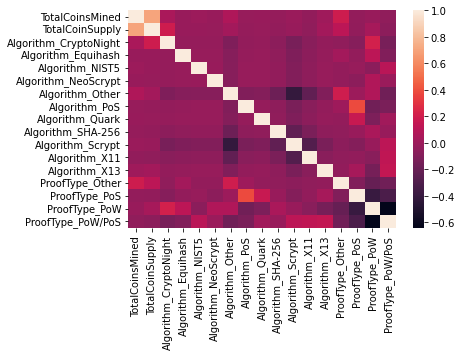

In [29]:
corrs = df_train.corr()
sns.heatmap(corrs)
plt.show()

[0.495, 0.118, 0.089, 0.082, 0.059, 0.05, 0.031, 0.018, 0.015, 0.009, 0.008, 0.008, 0.006, 0.006, 0.005, 0.0, 0.0]


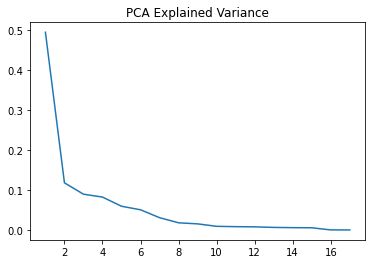

In [30]:
# Initialize PCA model
pca = PCA(n_components=len(df_train.columns))
pca.fit(df_train)

print([round(x, 3) for x in pca.explained_variance_ratio_])
plt.plot(range(1,len(df_train.columns)+1), pca.explained_variance_ratio_)
plt.title("PCA Explained Variance")
plt.show()

In [31]:
sum([0.495, 0.118, 0.089, 0.082, 0.059, 0.05, 0.031, 0.018, 0.015, 0.009, 0.008, 0.008, 0.006, 0.006])

0.9940000000000001

In [32]:
pca = PCA(n_components=0.95)
pca.fit(df_train)

print([round(x, 3) for x in pca.explained_variance_ratio_])

[0.495, 0.118, 0.089, 0.082, 0.059, 0.05, 0.031, 0.018, 0.015]


In [33]:
df_pca = pd.DataFrame(pca.transform(df_train))
df_pca.columns = [f"Feature {x}" for x in range(1, len(pca.explained_variance_ratio_)+1)]
df_pca.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9
0,-0.217131,-0.896267,0.378638,-0.370731,-0.087521,-0.288928,-0.000649,-0.027602,-0.027241
1,-0.195243,-0.898326,0.370452,-0.377274,-0.088020,-0.287457,-0.000382,-0.028807,-0.027389
2,3.523125,-0.476285,2.171310,1.972656,-0.198131,-0.111387,0.210601,-0.188368,0.323573
3,-0.185170,0.651278,-0.010801,-0.094727,-0.198288,0.454131,0.829598,0.195923,-0.272624
4,-0.156799,0.846609,-0.364278,0.197044,-0.274519,-0.430230,-0.083059,-0.115133,-0.092318


In [34]:
# TSNE Model

In [35]:
tsne = TSNE(random_state=42)
tsne_features = tsne.fit_transform(df_pca)
print(tsne_features.shape)

(532, 2)


In [36]:
tsne_df = pd.DataFrame(tsne_features, columns=["Feature1", "Feature2"])
tsne_df.head()

,Feature1,Feature2
0,10.798165,-14.777182
1,5.596850,-11.344583
2,11.055183,-2.105695
3,-16.723459,-23.416933
4,10.367872,17.480459


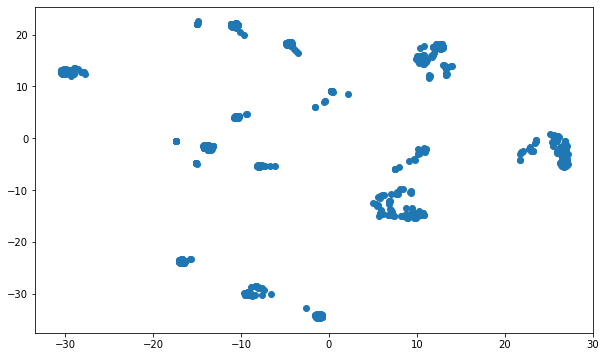

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(tsne_df.Feature1, tsne_df.Feature2)
plt.show()

In [38]:
# KMEANS

C:\Users\Babatunde Onwukeme\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


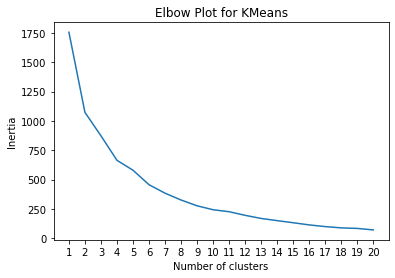

In [39]:
inertia = []
k = list(range(1, 21))


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,21))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("Elbow Plot for KMeans")
plt.show()

In [40]:
def getSilhouette(X, range_n_clusters, model = "kmeans"):
    for n_clusters in range_n_clusters:

        # Create a subplot with 1 row and 2 columns
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        if model == "kmeans":
            clusterer = KMeans(n_clusters=n_clusters, random_state=42)
        else:
            clusterer = AgglomerativeClustering(n_clusters=n_clusters,
                                 affinity='euclidean',
                                 linkage='ward')
            
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


        plt.suptitle(
            f"Silhouette analysis for {model} clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.9153401897797991
For n_clusters = 3 The average silhouette_score is : 0.7269800791333202
For n_clusters = 4 The average silhouette_score is : 0.29367556071090445
For n_clusters = 5 The average silhouette_score is : 0.3020671285475
For n_clusters = 6 The average silhouette_score is : 0.3884594916886394
For n_clusters = 7 The average silhouette_score is : 0.39818465148037413
For n_clusters = 8 The average silhouette_score is : 0.44343779255305305
For n_clusters = 9 The average silhouette_score is : 0.5160206005167325
For n_clusters = 10 The average silhouette_score is : 0.5576772004350525
For n_clusters = 11 The average silhouette_score is : 0.5858321807300644
For n_clusters = 12 The average silhouette_score is : 0.6399461512290169
For n_clusters = 13 The average silhouette_score is : 0.6512988526053601
For n_clusters = 14 The average silhouette_score is : 0.6736696754301891
For n_clusters = 15 The average silhouette_score is : 0.724

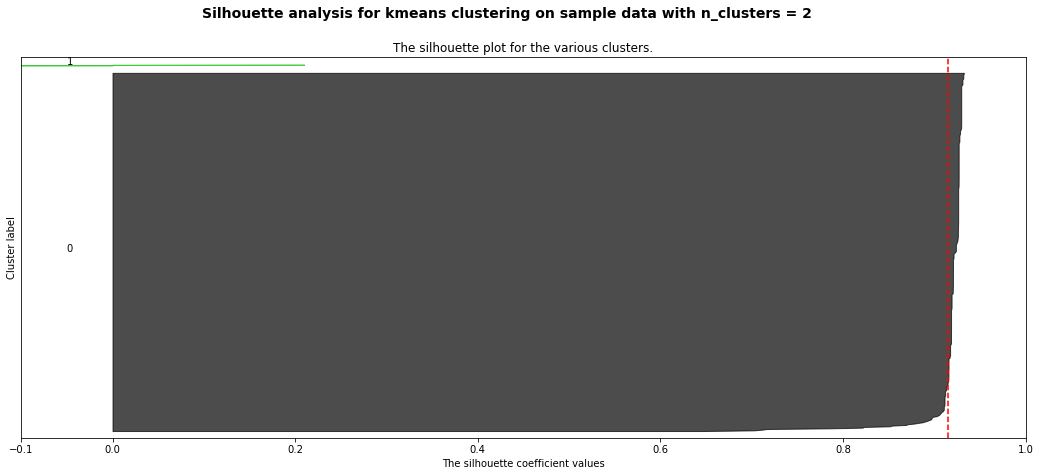

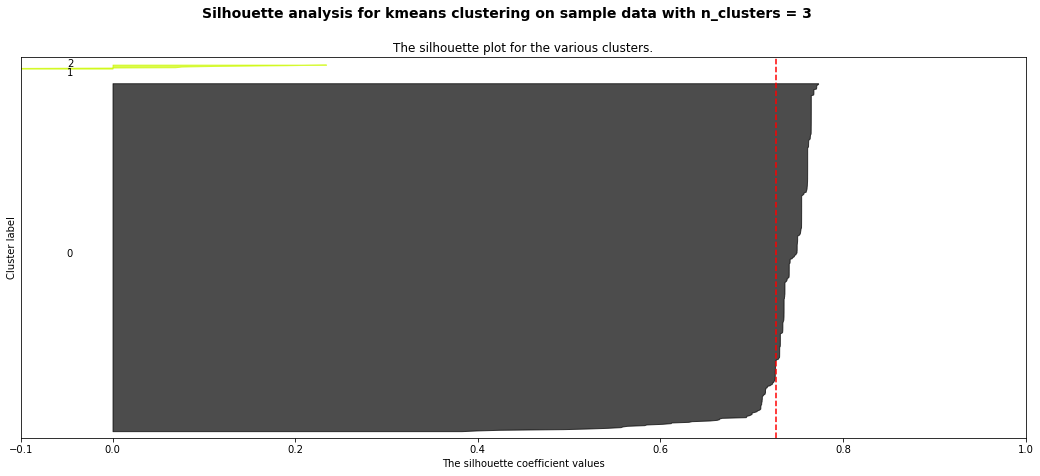

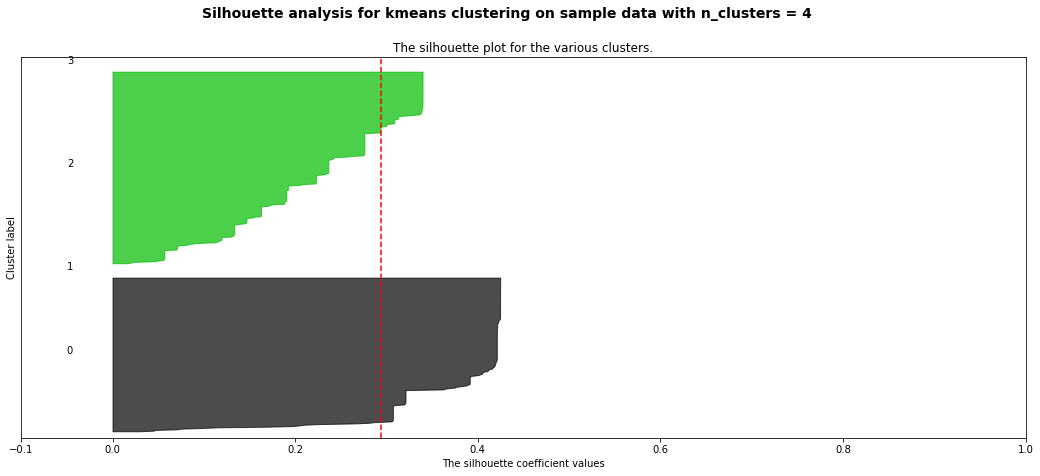

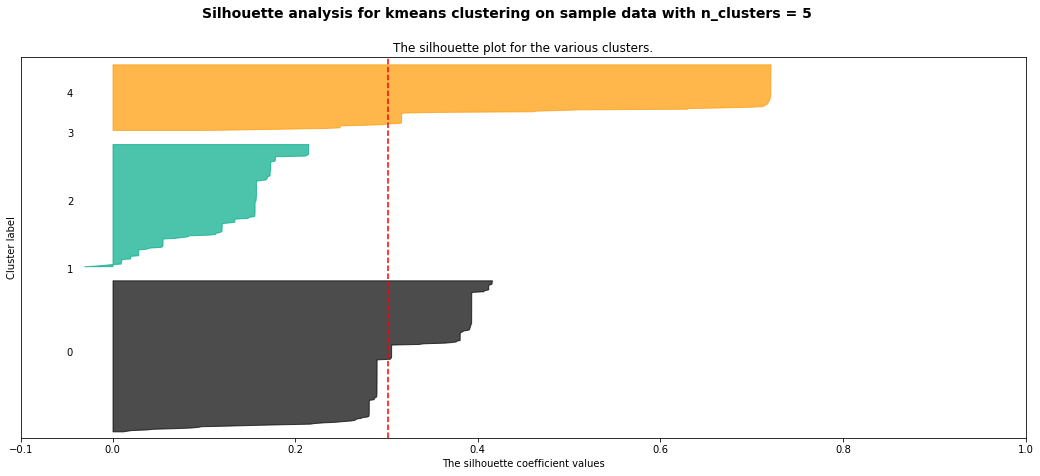

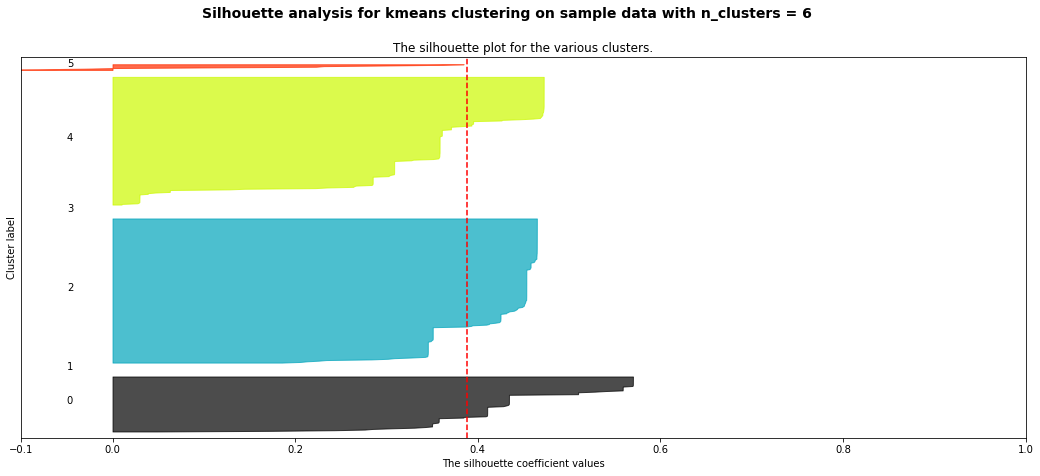

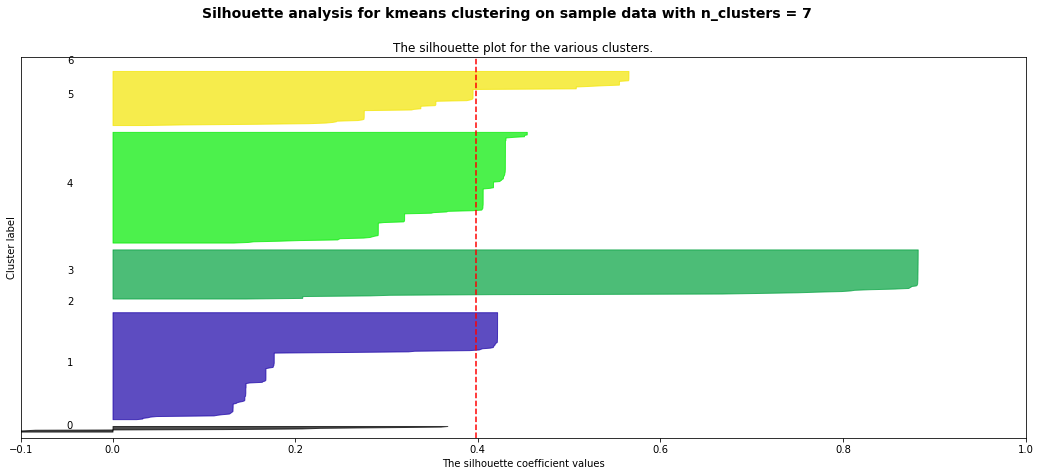

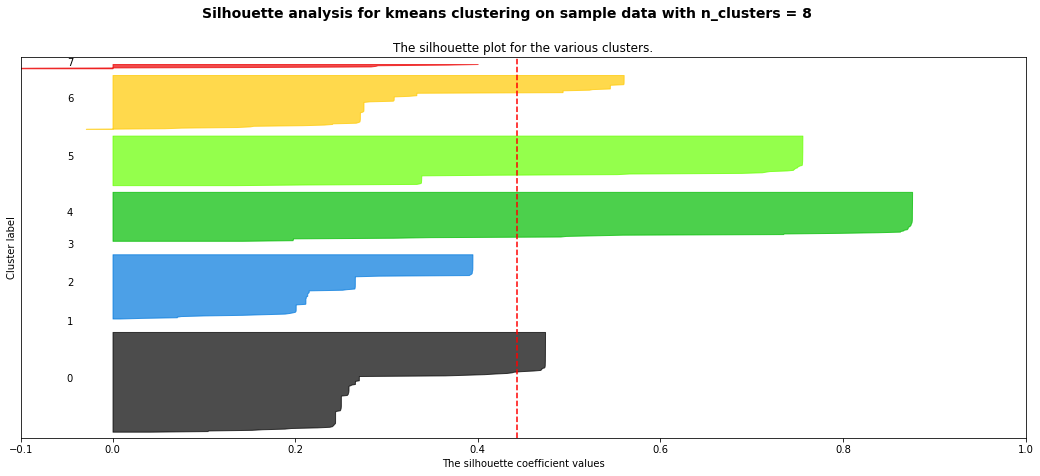

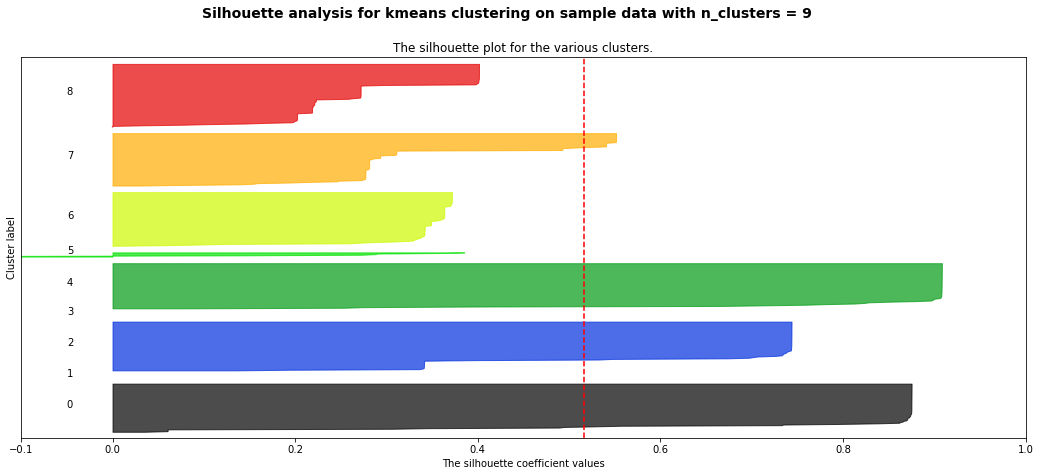

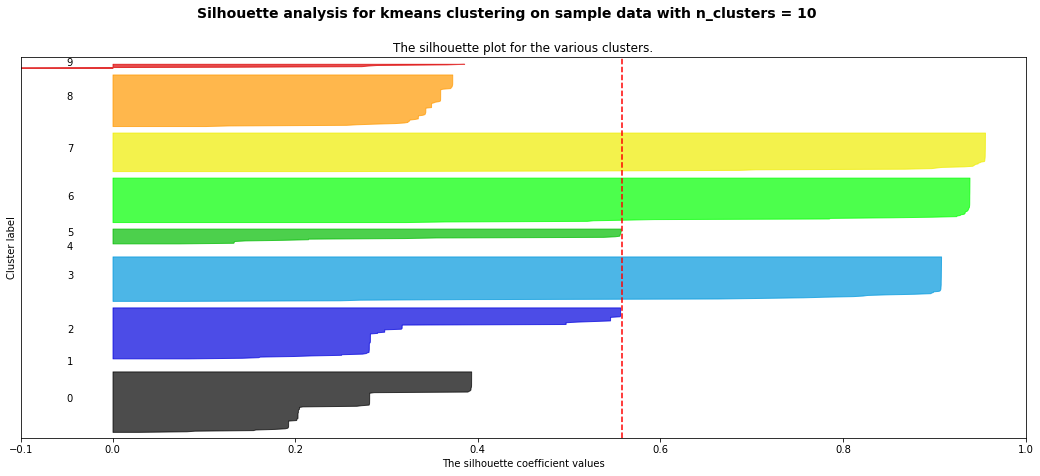

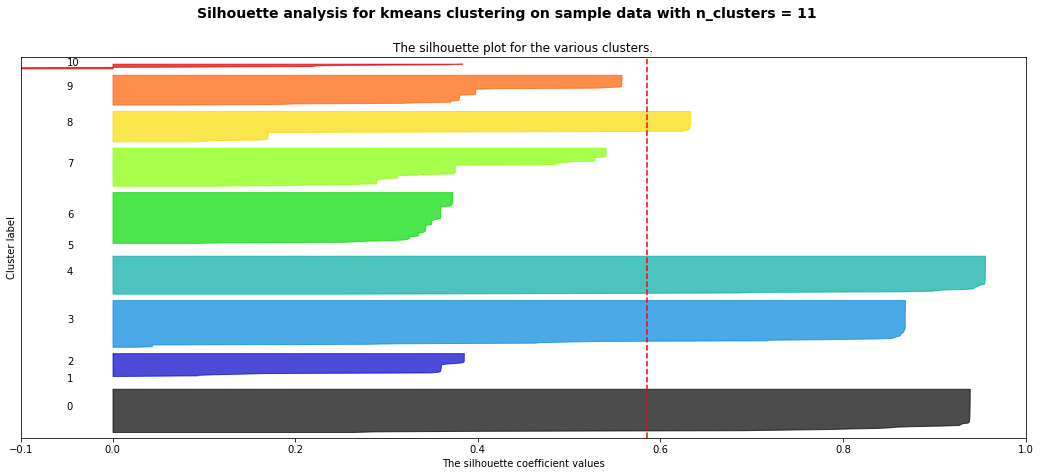

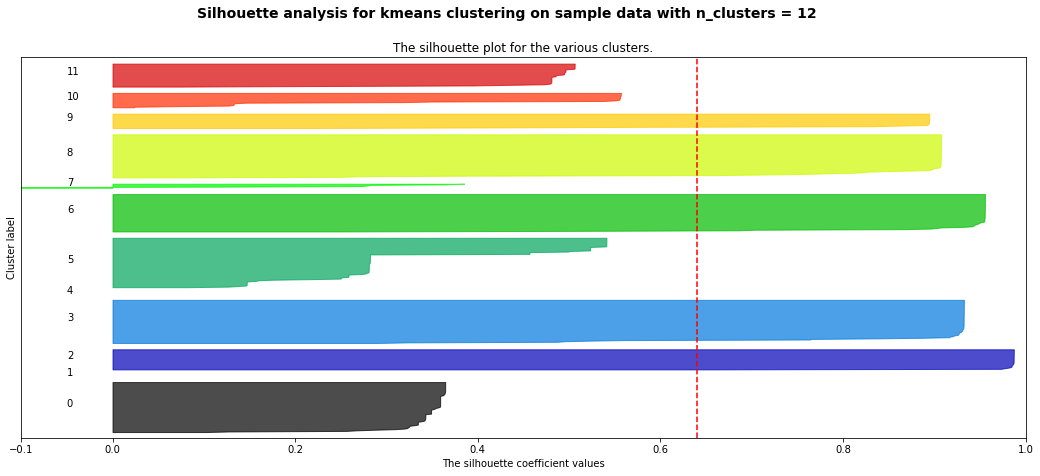

In [ ]:
# Grab Silhouette Scores
X = df_pca.values
range_n_clusters  = list(range(2,21))

getSilhouette(X, range_n_clusters, "kmeans")

In [ ]:
#Hierarchical Clustering
mergings = linkage(df_pca, method='ward')

plt.figure(figsize=(20,8))
dendrogram(mergings,
           p = 7,
           truncate_mode = 'level',
          leaf_rotation=90,
          leaf_font_size=5)
plt.show()

In [ ]:
# Initialize model with K = 2
k = 2
model = KMeans(n_clusters=k, random_state=42)

# Fitting model
model.fit(df_pca)

# Predictions
k_labels = model.predict(df_pca)

plt.figure(figsize=(10, 6))
plt.scatter(tsne_df["Feature1"], tsne_df["Feature2"], c=k_labels)
plt.show()

In [ ]:
df_name = pd.DataFrame()
df_name["CoinName"] = name
df_name["Cluster"] = k_labels

df_name.loc[df_name.Cluster == 2]

In [ ]:
df.loc[df.CoinName.isin(["ByteCoin", "gCn Coin", "Qwertycoin"])]

In [ ]:
# Initialize model with K = 20
k = 20
model = KMeans(n_clusters=k, random_state=42)

# Fitting model
model.fit(df_pca)

# predictions
k_labels = model.predict(df_pca)

plt.figure(figsize=(10, 6))
plt.scatter(tsne_df["Feature1"], tsne_df["Feature2"], c=k_labels)
plt.show()

In [ ]:
df_name = pd.DataFrame()
df_name["CoinName"] = name
df_name["Cluster"] = k_labels

In [ ]:
df_name